<a href="https://colab.research.google.com/github/berndheidemann/notebooks_fastai/blob/master/fastai_house_prices_feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.tabular import * 
from fastai.imports import *

In [103]:
!gdown https://drive.google.com/uc?id=1Jx-n-46S4yGaqOH6RpLM6I0INRv9rOJC

Downloading...
From: https://drive.google.com/uc?id=1Jx-n-46S4yGaqOH6RpLM6I0INRv9rOJC
To: /content/house-prices-advanced-regression-techniques.zip
100% 196k/196k [00:00<00:00, 57.1MB/s]


In [104]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_description.txt    
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [0]:
df_train=pd.read_csv("./train.csv")

In [106]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [211]:
df_train.head(5).transpose()

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [0]:
df_test=pd.read_csv("./test.csv")

In [0]:
path="./"
dep_var = 'SalePrice'

In [0]:
cat_names=['LandContour', 'Neighborhood', 'Condition1', 'BldgType', 'RoofStyle', 'RoofMatl', 'ExterCond', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFullBath', 'GarageType', 'GarageFinish', 'KitchenQual', 'FireplaceQu', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'CentralAir', 'Exterior1st', 'Exterior2nd', 'YrSold', 'HouseStyle', 'MoSold', 'MiscFeature', 'PoolQC', 'Fence', 'GarageQual', 'SaleType', 'SaleCondition']
cont_names=['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'BedroomAbvGr', 'TotalBsmtSF' , 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [112]:
len(cont_names)

28

In [0]:
test_na_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea' ]
for col in test_na_cols:
  df_test[col] = df_test[col].fillna(0)

In [0]:
procs = [FillMissing, Categorify, Normalize]
df_test["SalePrice"]=0
df_test.SalePrice.astype("float")
test = TabularList.from_df(df_test,  cat_names=cat_names, cont_names=cont_names, procs=procs)

In [0]:

data = (TabularList.from_df(df_train, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct(0.2)
                           .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                           .add_test(test, label=0)
                           .databunch())

In [0]:
learn = tabular_learner(data, layers=[200, 100], metrics=root_mean_squared_error, wd=0.1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


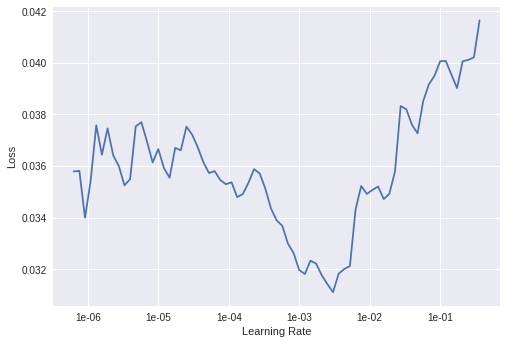

In [341]:
learn.lr_find()
learn.recorder.plot()

In [342]:
learn.fit_one_cycle(10,5e-4, pct_start=0.8)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.034900,0.026637,0.162274,00:00
1,0.034540,0.022857,0.150061,00:00
2,0.031976,0.021229,0.144366,00:00
3,0.029631,0.020222,0.140549,00:00
4,0.026400,0.017678,0.130496,00:00
5,0.023628,0.016247,0.124467,00:00
6,0.021524,0.015873,0.122769,00:00
7,0.020058,0.016726,0.126022,00:00
8,0.018685,0.015647,0.121918,00:00
9,0.017977,0.015718,0.122135,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


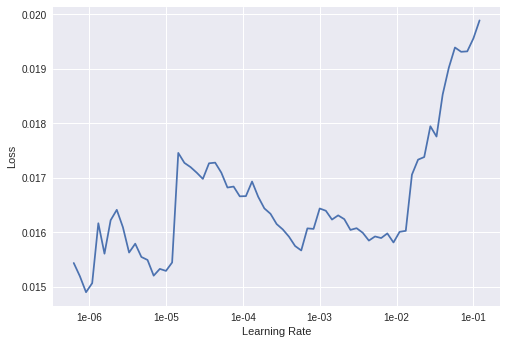

In [343]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save("stage-1")

In [344]:
learn.fit_one_cycle(5, 5e-6, pct_start=0.8)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.016457,0.015442,0.121097,00:00
1,0.016138,0.015047,0.119460,00:00
2,0.015798,0.015475,0.121155,00:00
3,0.015164,0.015397,0.120490,00:00
4,0.015787,0.015273,0.120296,00:00


In [0]:
learn.save("stage-2")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


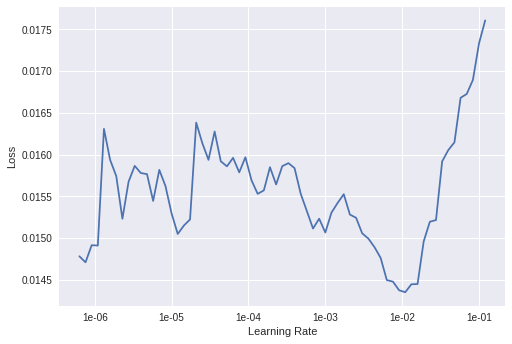

In [345]:
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(5, 1e-4, pct_start=0.8)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.010769,8.263817,1.442622,00:00
1,0.011211,8.296050,1.445213,00:00
2,0.011397,3.861807,1.016309,00:00
3,0.011907,5.585168,1.202635,00:00
4,0.012189,11.008412,1.651143,00:00


In [0]:
learn.save("stage-2")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


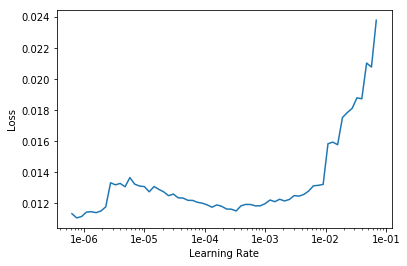

In [53]:
learn.lr_find()
learn.recorder.plot()

In [52]:
learn.validate()

[6.0438213, tensor(1.2474)]

In [54]:
learn.fit_one_cycle(10, 1e-5, pct_start=0.8)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.013938,9.252924,1.521179,00:00
1,0.013194,1.397809,0.649191,00:00
2,0.012482,7.538212,1.382112,00:00
3,0.012180,15.517880,1.941366,00:00
4,0.012095,4.161667,1.052113,00:00
5,0.012575,11.830463,1.707124,00:00
6,0.012624,5.859176,1.230609,00:00
7,0.012554,3.699537,0.996855,00:00
8,0.012511,2.664604,0.859802,00:00
9,0.012342,10.089571,1.583413,00:00


In [28]:
#learn.load("stage-1")

learn.validate()

[6.0438213, tensor(1.2474)]

# permutation importance

In [0]:
def feature_importance(learner, cat_names, cont_names): 
  # based on: https://medium.com/@mp.music93/neural-networks-feature-importance-with-fastai-5c393cf65815
  loss0=np.array([learn.loss_func(learn.pred_batch(batch=(x,y.to("cpu"))), y.to("cpu")) for x,y in iter(learner.data.valid_dl)]).mean(); loss0
  fi=dict()
  types=[cat_names, cont_names]
  for j, t in enumerate(types):
    for i, c in enumerate(t):
      loss=[]
      for x,y in iter(learner.data.valid_dl):
        col=x[j][:,i]    
        idx = torch.randperm(col.nelement())
        x[j][:,i] = col.view(-1)[idx].view(col.size())
        y=y.to('cpu')
        loss.append(learn.loss_func(learn.pred_batch(batch=(x,y)), y))
      fi[c]=np.array(loss).mean()-loss0
  d = sorted(fi.items(), key=lambda kv: kv[1], reverse=True)
  return pd.DataFrame({'cols': [l for l, v in d], 'imp': np.log1p([v for l, v in d])})

In [0]:
fi = feature_importance(learn, cat_names, cont_names)

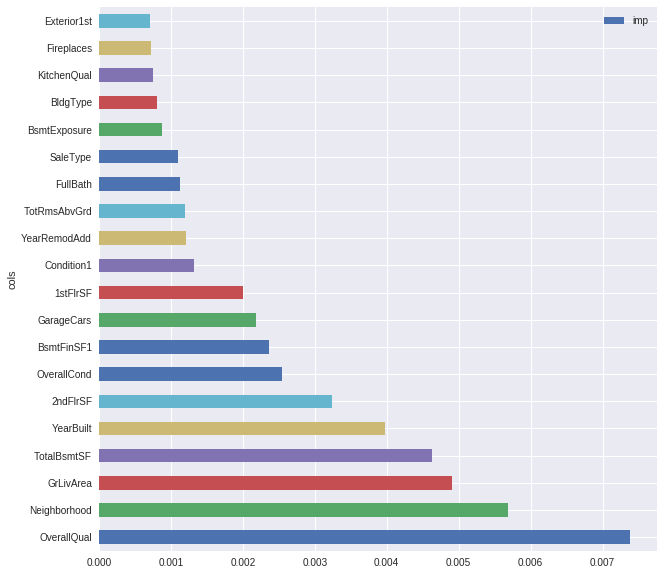

In [124]:
fi[:20].plot.barh(x="cols", y="imp", figsize=(10, 10))

# Partial Dependencies Plots

In [0]:
def partial_dependence(learn, df, feature):
  pdi=dict()
  steps=30
  ci=learner.data.col_names.index(feature)
  is_cat=feature in learn.data.get(0).classes
  if is_cat: 
    vals=learn.data.get(0).classes[feature] 
    j=0
  else: 
    j=1
    vals= np.linspace(df_train[feature].min(), df_train[feature].max(), num=steps)
    if vals[-1]-vals[0]>steps:
      vals=np.floor(vals).astype("int")
    ci-=len(learn.data.get(0).classes)
    mean=df[feature].mean()
    std=df[feature].std()
  baseY=np.array([learn.pred_batch(batch=(x,y.to("cpu"))).mean() for x,y in iter(learner.data.valid_dl)]).mean()
  for i, val in enumerate(vals):
    ys=[]
    for x,y in iter(learner.data.valid_dl):
      x[j][:,ci] = torch.full((x[j][:,ci].shape), i if is_cat else (val-mean)/(1e-7+std))
      y=y.to('cpu')
      ys.append(np.array(learner.pred_batch(batch=(x,y))).mean())
    pdi[val]=np.array(ys).mean()-baseY
  if is_cat:
    d = sorted(pdi.items(), key=lambda kv: kv[1], reverse=True)
  else:
    d=list(pdi.items())
  return pd.DataFrame({'vals': [k for k, v in d], 'diff': [v for k, v in d]})

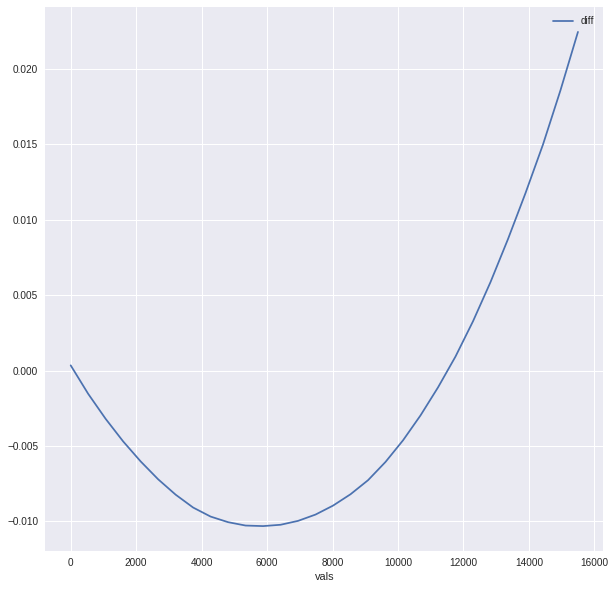

In [399]:
pdi=partial_dependence(learner, df_train, "MiscVal")
pdi.plot.line(x="vals", y="diff", figsize=(10, 10))

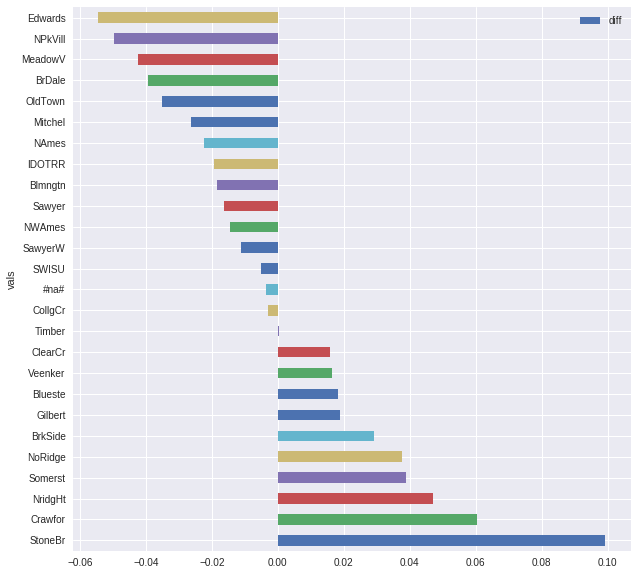

In [400]:
pdi=partial_dependence(learner, df_train, "Neighborhood")
pdi.plot.barh(x="vals", y="diff", figsize=(10, 10))

In [246]:
df_train[df_train.Neighborhood=="Edwards"].SalePrice.mean()

128219.7

In [245]:
df_train[df_train.Neighborhood=="StoneBr"].SalePrice.mean()

310499.0

#linear correlations

only cont_vars

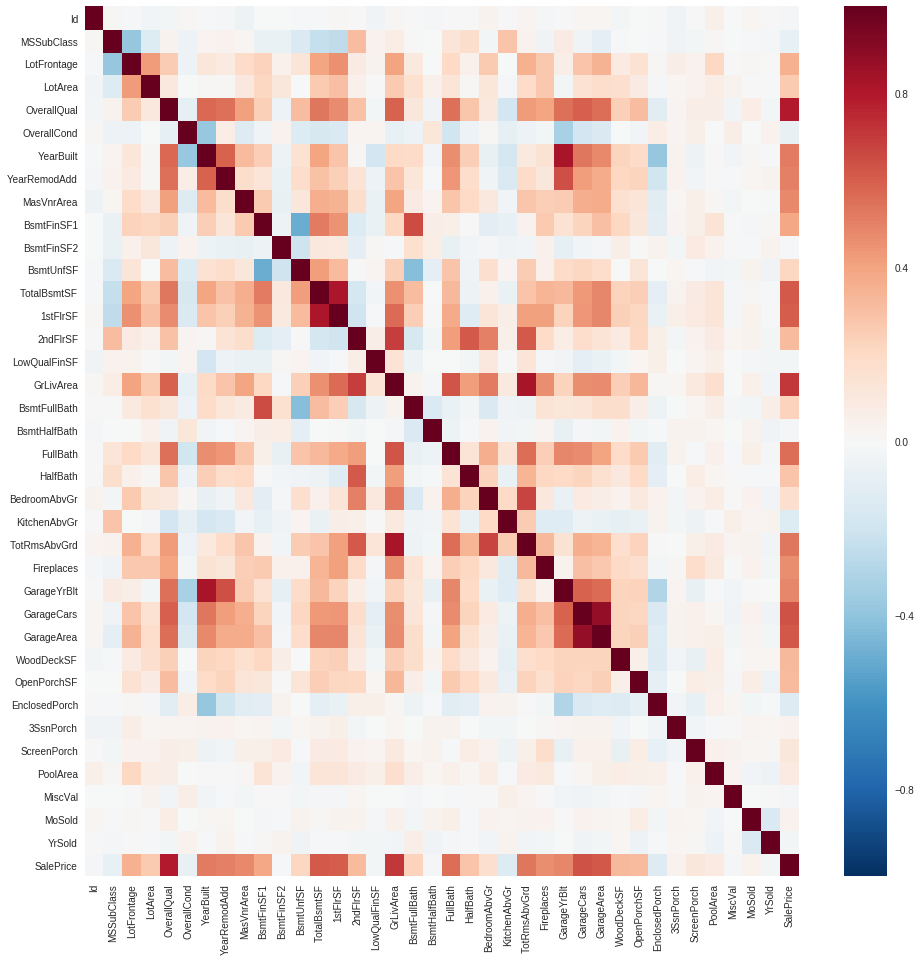

In [98]:
import seaborn as sns
corr = df_train.corr()
plt.figure(figsize = (16,16))
sns.heatmap(corr)
plt.show()

# Submission

In [0]:
predictions, y = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
prices=np.exp(np.squeeze(predictions))

In [0]:
prices[:5]

tensor([121074.3047, 158999.4375, 166487.5000, 209334.7500, 192466.0469])

In [0]:
res_df = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': prices})
res_df.to_csv('houses_submission.csv', index=False)

In [0]:
!cat houses_submission.csv

Id,SalePrice
1461,127009.97
1462,162278.36
1463,181210.1
1464,198201.72
1465,190616.72
1466,170389.48
1467,175004.84
1468,167414.62
1469,188260.55
1470,125289.5
1471,185358.98
1472,98543.36
1473,91256.516
1474,148074.36
1475,110168.37
1476,353076.44
1477,248885.31
1478,274293.12
1479,291372.38
1480,478466.97
1481,334600.84
1482,209652.22
1483,173243.48
1484,160705.31
1485,184766.34
1486,194548.97
1487,319199.2
1488,246600.16
1489,206838.52
1490,257044.02
1491,193147.84
1492,90771.664
1493,170134.06
1494,283770.62
1495,289509.1
1496,236068.14
1497,182682.55
1498,169450.25
1499,167525.45
1500,156371.89
1501,178903.47
1502,161535.52
1503,290466.53
1504,243105.05
1505,235761.25
1506,179362.16
1507,250764.88
1508,194243.62
1509,159555.08
1510,142454.97
1511,145528.66
1512,172002.2
1513,133575.55
1514,150714.33
1515,195473.27
1516,143356.36
1517,170934.55
1518,132000.6
1519,207972.88
1520,133213.88
1521,134709.38
1522,169609.67
1523,121801.14
1524,125518.88
1525,124275.25
1526,117273.945
152